# 합성곱 신경망의 시각화

## 가중치 시각화

In [ ]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.keras 파일을 다운로드받아 사용하세요.
# !wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras
# 버전문제로 8.2에서 만든 keras 파일로 사용

In [46]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.keras')

In [47]:
model.layers

In [48]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [49]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.017933488 0.19891009


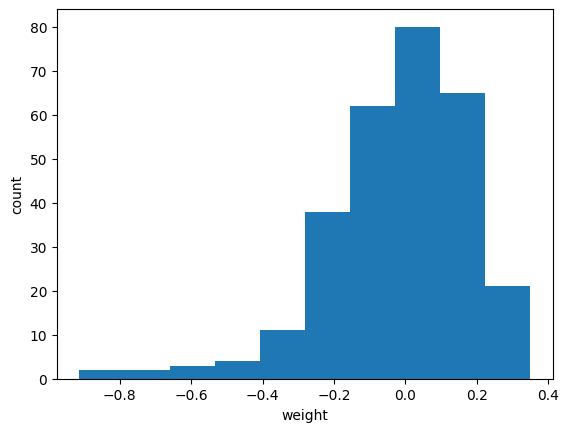

In [50]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

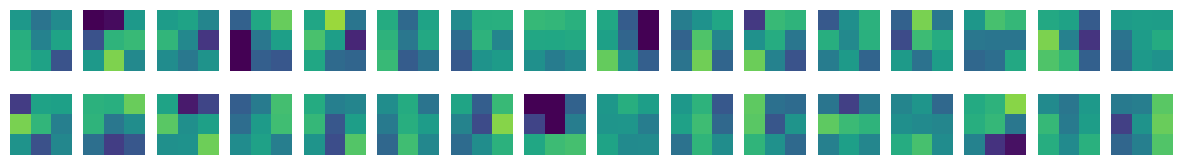

In [51]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [52]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28,28,1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same'))

In [53]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)


(3, 3, 1, 32)


In [54]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.00060312345 0.08089332


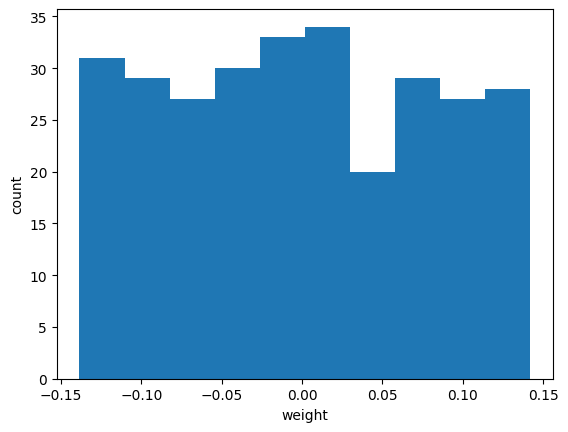

In [55]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

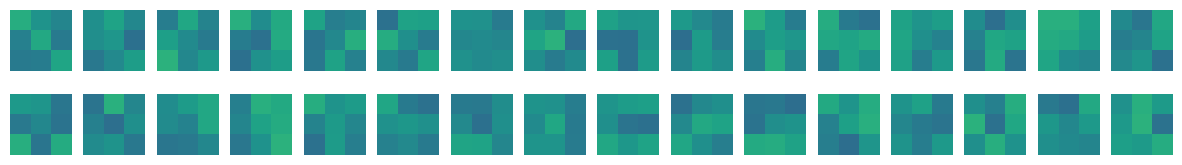

In [56]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

## 함수형 API

In [57]:
inputs = keras.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation='softmax')

hidden = dense1(inputs)
outputs = dense2(hidden)

func_model = keras.Model(inputs, outputs)

In [58]:
print(model.inputs)

[<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_1')>]


In [59]:
conv_acti = keras.Model(model.inputs[0], model.layers[0].output)

## 특성 맵 시각화

In [60]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

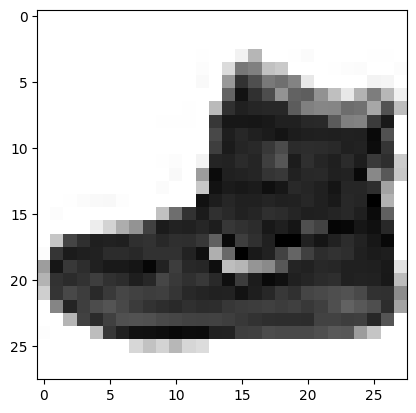

In [61]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [62]:
ankle_boot = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(ankle_boot)

1/1 [==============================] - 1s 1s/step


In [63]:
print(feature_maps.shape)

(1, 28, 28, 32)


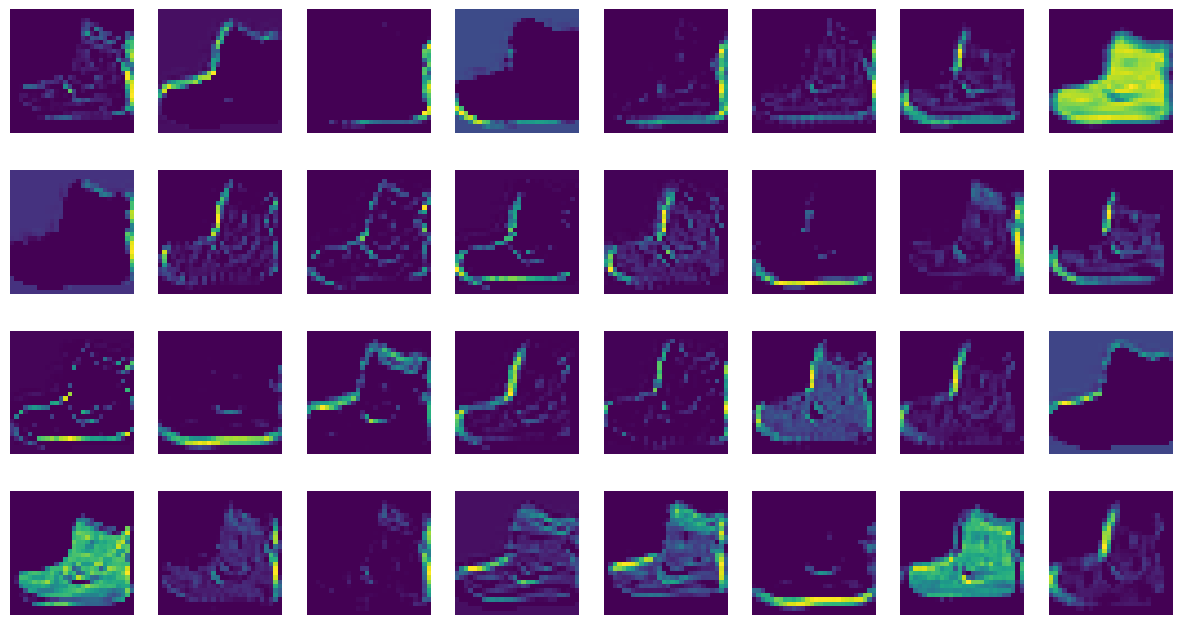

In [64]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

In [65]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [66]:
feature_maps = conv2_acti.predict(ankle_boot)

1/1 [==============================] - 0s 242ms/step


In [67]:
print(feature_maps.shape)

(1, 14, 14, 64)


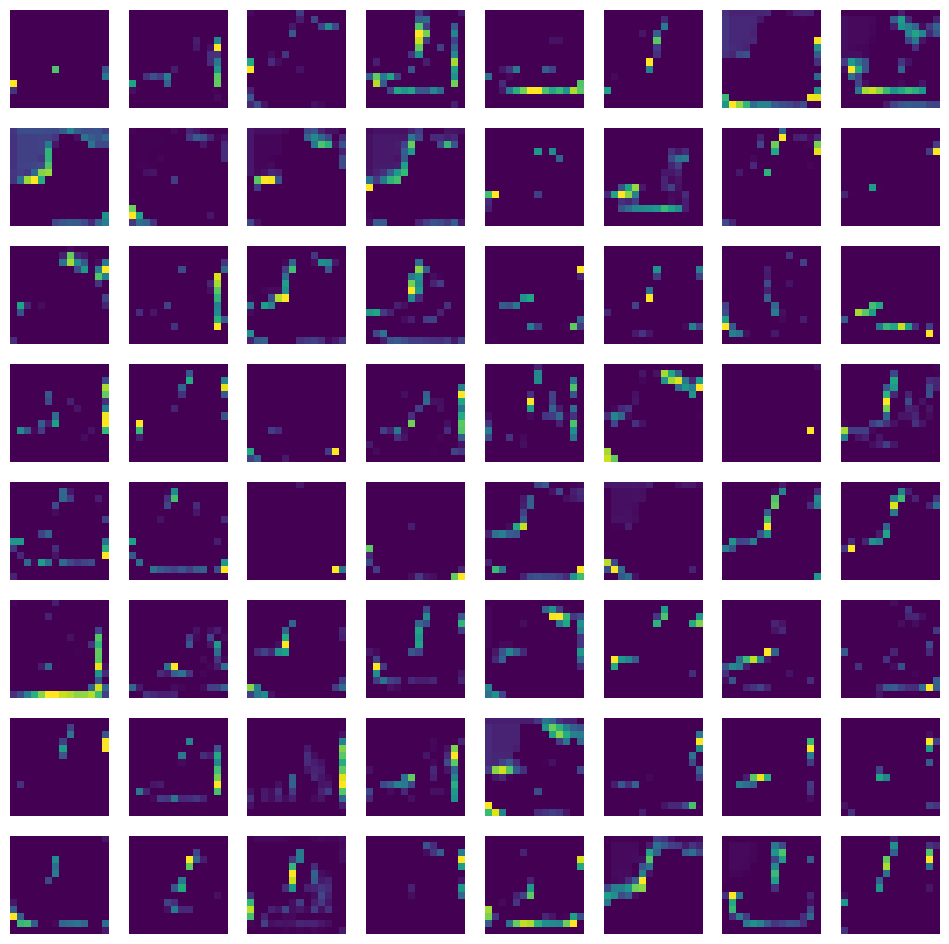

In [68]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()